#  Import all required libraries

In [17]:
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

!pip install pymysql
import sqlalchemy as db
from sqlalchemy import create_engine

# Define usecase, define the url to scrape and get the response
<< Web Scraping News Articles from the Rio de Janeiro Public Security Institute to build an NLP Data Pipeline>>

In [18]:
# get the url
url = 'http://www.isp.rj.gov.br/NoticiaLista.asp'
response = requests.get(url)

In [20]:
# get the HTML and do the soup
html = response.content
soup = BeautifulSoup(html)

In [21]:
# define a variable ver_mais to the the tag's url information
ver_mais = soup.find_all('a', {'class':'verMais'})
'http://www.isp.rj.gov.br/' + soup.find_all('a', {'class':'verMais'})[0].get('href')

'http://www.isp.rj.gov.br/Noticias.asp?ident=475'

In [22]:
# here we have the url of one page with it's around 10 news
noticias = ['http://www.isp.rj.gov.br/'+ url.get('href') for url in ver_mais]

In [23]:
# create a function to make it easier to return the info we need: first we request the url, get the response and do the soup and then we declare and return the variables we need for the NLP
# soup_title, soup_data, soup_content
def scrape(url):
    response = requests.get(url)
    html = response.content
    scrape_pgs = BeautifulSoup(html)
    
    soup_title = scrape_pgs.find('h3').text
    soup_data = scrape_pgs.find('p', {'class': 'dataHoraNoticia'}).text
    soup_content = scrape_pgs.find('div', {'class':'conteudo'}).text
    
    return soup_title, soup_data, soup_content

In [26]:
# here we have the url of all tens of pages from 2008 to 2021
pages = [f'http://www.isp.rj.gov.br/Noticias.asp?ident={pages}' for pages in range(1,476)]

In [27]:
# here we call the function scrape we created so that it returns: soup_title, soup_data, soup_content for each news in the given http
scrape_pgs = scrape('http://www.isp.rj.gov.br/Noticias.asp?ident=1')

In [29]:
# here we create a for loop so that it returns a list with all the scraped pages returning: soup_title, soup_data, soup_content for each news
all_scrape = []
for i in pages:
    all_scrape.append(scrape(i))

KeyboardInterrupt: 

# Transform the list of objects in a Dataframe 

In [ ]:
# transforming our list of items in a dataframe 
all_scrape
# Calling DataFrame constructor on list 
df_isp = pd.DataFrame(all_scrape, columns =['titulo', 'data', 'conteudo'], dtype = str) 
df_isp.head()

# Data cleaning: remove stop words

### Import NLTK library to add stop words 
<<The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) >>


In [ ]:
import nltk
nltk.download('stopwords')
# Importing stopwords in portuguese
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
from nltk.tokenize import word_tokenize
import regex
import string
nltk.download('punkt')

### Adding  stop words to NLTK stoplist


In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
new_stopwords = ['de', 'da','do', 'em', 'na', 'no','mês','janeiro','fevereiro','março','abril','maio', 'junho','julho','agosto', 'setembro', 'outubro', 'novembro', 'dezembro', 'dois', 'três','quatro','cinco','seis','sete','oito','nove', 'dez',
               'onze','doze','vinte','trinta','quarenta','cinquenta','sessenta','setenta','oitenta','noventa','cem', 'email', 'renata', 'fortes','rfortesisprjgovbrwwwisprjgovbr', 'assim', 'segundafeira','terçafeira',
               'quartafeira','quintafeira','sextafeira','sábado','domingo','feira', 'enquanto', 'dia','ano', 'instituto', 'pública', 'isp', 'divulgou', 'assessoria', 'imprensa','comparados', 'período', 'destaque',
                'acontece', 'entanto', 'vale', 'observar', 'dessa','outras', 'irão', 'disso','daquele', 'daquela', 'deste', 'desta', 'tendo','participou','nesta', 'semana', 'a', 'à', 'adeus', 'agora', 'aí', 
                 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 
                 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada',
                 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 
                 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 
                 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 
                 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 
                 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes',
                 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc',
                 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 
                 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão',
                 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 
                 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria',
                 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 
                 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes',
                 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 
                 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos',
                 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 
                 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 
                 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro',
                 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 
                 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto',
                 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 
                 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus',
                 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes',
                 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 
                 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', 
                 '5', '6', '7', '8', '9', '0', '_' ,  'andar', 'sr', 'sra','dona', 'ficou', 'fica', 'ficaram', 'apresentou', 'apresenta', 'participa', 'liberar', 'tipo', 'tipos', 'promove', 'divulga', 
                 'apresentação','entrega', 'semestre', 'trimestre', 'divulgou', 'apresentou', 'marca','marcam','constata','constatou','abre','abriu','abriram','esclarece','esclareceu', 'promoveu', 'melhor',
                 'melhores', 'pior', 'piores', 'foto','divulgação'
                
                ]
stopwords.extend(new_stopwords)

### Creating functions to clean columns

In [31]:
def clean_conteudo(i):
    i= regex.sub("\s+", " ", i) #remove extra space
    i= regex.sub("[^\w ]", "", i) #remove punctuation
    i= regex.sub("\d+", "", i) #remove numbers
    i= regex.sub("/\r?\n|\r/", "", i) #remove new lines
    i = "".join([words.lower() for words in i if words not in string.punctuation]) # convert all words to lower case = case normalization
    # Tokenization: Splitting a sentence into words and creating a list, ie each sentence is a list of words
    nltk.tokenize.word_tokenize(i) 
    #removing stop words:
    words = nltk.tokenize.word_tokenize(i)
    words_new = [x for x in words if x not in stopwords]
    i= regex.sub("\ ", " ", i) #remove extra space
    
    return words_new

df_isp['materia'] = df_isp['materia'].apply(clean_conteudo)
    

In [ ]:
# df_isp["data_noticia"] = lista_date
# df_isp.drop('data', axis =1, inplace= True)  ==> already dropped

In [32]:
def clean_data(i):
        return regex.sub('[a-zA-Z]|\d{2}:\d{2}h', '', i)
            
df_isp['data'] = df_isp['data'].apply(clean_data)

In [33]:
def clean_titulo(i):
    i= regex.sub("\s+", " ", i) #remove extra space
    i= regex.sub("[^\w ]", "", i) #remove punctuation
    i= regex.sub("\d+", " ", i) #remove numbers
    i = "".join([words.lower() for words in i if words not in string.punctuation]) # convert all words to lower case = case normalization
    # Tokenization: Splitting a sentence into words and creating a list, ie each sentence is a list of words
    nltk.tokenize.word_tokenize(i) 
    #removing stop words:
    words = nltk.tokenize.word_tokenize(i)
    words_new = [x for x in words if x not in stopwords]
    i= regex.sub("\ ", " ", i) #remove extra space
    
    
    return words_new
    
df_isp['manchete'] =df_isp['manchete'].apply(clean_titulo)    

# Drop, rename and reorganize columns

In [34]:
df_isp.head()

,data,manchete,materia
0,06/03/2008,"[roubos, veículos, estado, queda]","[segurança, estatísticas, criminalidade, estad..."
1,07/03/2008,"[começa, curso, capacitação, policiais]","[presidente, segurança, mário, sérgio, duarte,..."
2,07/03/2008,"[dossiê, mulher]","[segurança, informa, publicação, série, estudo..."
3,07/03/2008,"[reunião, apresentará, presidente, segurança]","[presidente, segurança, mário, sergio, brito, ..."
4,07/03/2008,"[transparência, agilidade, clareza, levantamen...","[tenentecoronel, mário, sérgio, brito, duarte,..."


In [ ]:
df_isp = df_isp.rename(columns={'new_content': 'materia', 'new_title': 'manchete'})
df_isp = df_isp[['new_data','manchete','materia','titulo','data','conteudo']]
df_isp

In [ ]:
df_isp = df_isp.rename(columns={'new_data':'data1'})
df_isp

In [ ]:
# df_isp = df_isp.iloc[:, [0,2,3,4]]
df_isp

In [ ]:
df_isp.drop('conteudo', axis =1, inplace= True) 

In [ ]:
df_isp = df_isp.rename(columns={'titulo': 'manchete', 'new_content': 'materia'})
df_isp = df_isp[['data','manchete','materia']]
df_isp

In [45]:
df_isp['materia'] = df_isp['materia'].apply(lambda x: " ".join(x))

In [47]:
df_isp['manchete'] = df_isp['manchete'].apply(lambda x: " ".join(x))

# Word Cloud

In [37]:
!pip install wordcloud

In [38]:
# loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

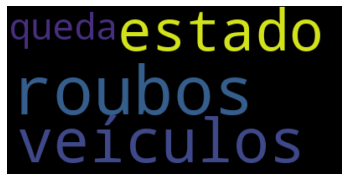

In [56]:
# Start with one review:
text = df_isp.manchete[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

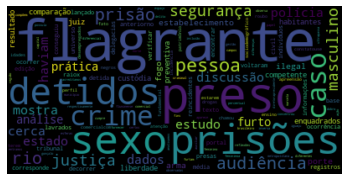

In [62]:
text = df_isp.materia[466]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

In [65]:
text = " ".join(noticias for noticias in df_isp.manchete)
print ("There are {} words in all manchetes from 2008 to 2021.".format(len(text)))

There are 19816 words in all manchetes from 2008 to 2021.


In [68]:
gun_mask = np.array(Image.open("gun.png"))
gun_mask

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)

In [75]:
def transform_format(val):
    if val == 2 or val == 0:
        return 255
    else:
        return val

In [76]:
# Transform your mask into a new one that will work with the function:
transformed_gun_mask = np.ndarray((gun_mask.shape[0], gun_mask.shape[1]), np.int32)

for i in range(len(gun_mask)):
    transformed_gun_mask[i] = list(map(transform_format, gun_mask[i]))

In [77]:
transformed_gun_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

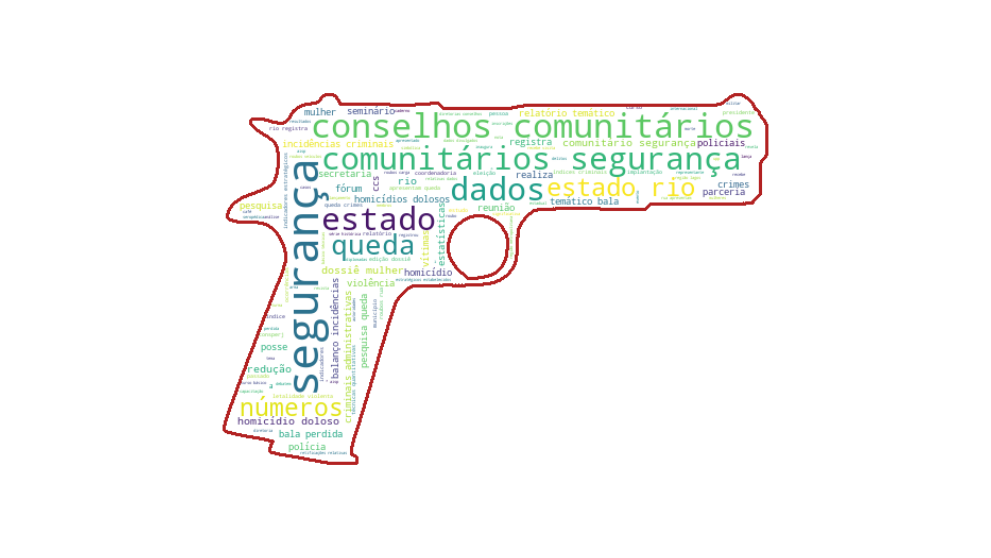

In [79]:
# Create a word cloud image
wc = WordCloud(background_color = "white", max_words = 1000, mask = transformed_gun_mask,
               stopwords = stopwords, contour_width = 3, contour_color = 'firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("gun.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
df_isp.head()

,data,manchete,materia
0,06/03/2008,"[roubos, veículos, estado, queda]","[segurança, estatísticas, criminalidade, estad..."
1,07/03/2008,"[começa, curso, capacitação, policiais]","[presidente, segurança, mário, sérgio, duarte,..."
2,07/03/2008,"[dossiê, mulher]","[segurança, informa, publicação, série, estudo..."
3,07/03/2008,"[reunião, apresentará, presidente, segurança]","[presidente, segurança, mário, sergio, brito, ..."
4,07/03/2008,"[transparência, agilidade, clareza, levantamen...","[tenentecoronel, mário, sérgio, brito, duarte,..."


# Connect to database¶
We'll use an API (Application Programming Interface) to connect to our database.
SQLAlchemy is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.

In [80]:
db_server='pymysql'
user='root'
db_port = '3306'
password = 'bigdata2021!!'
ip = 'localhost'
db_name = 'isp_rj_news'
engine = db.create_engine(f'mysql+{db_server}://{user}:{password}@{ip}:{db_port}/{db_name}?charset=utf8')
con = engine.connect()
sql_isp_conteudo = df_isp.to_sql(con=con, name='isp_rj_content', if_exists='replace')
sql_isp_conteudo